# Multiple Linear Regression



## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [17]:
dataset = pd.read_csv(r"C:\Users\Admin\Downloads\automobile_emissions.csv")

## EDA Steps

In [18]:
dataset.head()

,Engine Size (L),Horsepower,Fuel Type,CO2 Emissions (g/km)
0,3.0,102,Electric,0
1,1.3,274,Diesel,214
2,2.0,284,Diesel,341
3,1.8,129,Electric,0
4,3.3,274,Diesel,543


In [19]:
dataset.columns

Index(['Engine Size (L)', 'Horsepower', 'Fuel Type', 'CO2 Emissions (g/km)'], dtype='object')

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Engine Size (L)       100 non-null    float64
 1   Horsepower            100 non-null    int64  
 2   Fuel Type             100 non-null    object 
 3   CO2 Emissions (g/km)  100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [21]:
dataset.describe()

,Engine Size (L),Horsepower,CO2 Emissions (g/km)
count,100.000000,100.000000,100.000000
mean,2.544000,234.590000,296.100000
std,0.827595,75.717857,238.195171
min,1.200000,100.000000,0.000000
25%,1.800000,167.000000,0.000000
50%,2.550000,238.000000,290.000000
75%,3.200000,295.250000,414.500000
max,4.000000,350.000000,906.000000


## Preprocessing Steps

### 1. Preparing Data as input and output

In [22]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [23]:
print(X)

[[3.0 102 'Electric']
 [1.3 274 'Diesel']
 [2.0 284 'Diesel']
 [1.8 129 'Electric']
 [3.3 274 'Diesel']
 [3.1 326 'Petrol']
 [3.7 237 'Petrol']
 [1.4 292 'Petrol']
 [2.4 168 'Petrol']
 [1.3 296 'Diesel']
 [1.8 264 'Petrol']
 [2.6 187 'Electric']
 [1.3 128 'Electric']
 [1.8 175 'Petrol']
 [3.0 211 'Electric']
 [2.7 140 'Petrol']
 [1.8 216 'Petrol']
 [2.8 100 'Petrol']
 [3.5 344 'Electric']
 [1.2 284 'Electric']
 [3.5 324 'Petrol']
 [3.2 284 'Petrol']
 [2.2 167 'Petrol']
 [1.6 348 'Petrol']
 [3.9 228 'Diesel']
 [2.1 295 'Petrol']
 [1.5 145 'Electric']
 [1.5 229 'Petrol']
 [3.6 333 'Diesel']
 [2.9 127 'Electric']
 [3.5 322 'Diesel']
 [3.2 260 'Petrol']
 [2.7 176 'Electric']
 [3.9 315 'Petrol']
 [2.3 263 'Electric']
 [2.7 229 'Electric']
 [3.5 255 'Electric']
 [2.9 150 'Diesel']
 [3.6 139 'Petrol']
 [2.8 195 'Diesel']
 [3.2 295 'Diesel']
 [1.3 141 'Petrol']
 [1.8 238 'Petrol']
 [2.0 344 'Petrol']
 [1.4 299 'Electric']
 [1.9 336 'Diesel']
 [1.5 235 'Diesel']
 [2.0 335 'Diesel']
 [3.0 100 'D

### 2. Encoding categorical data

In [24]:
dataset['Fuel Type'].value_counts()

Fuel Type
Petrol      42
Diesel      32
Electric    26
Name: count, dtype: int64

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [26]:
print(X)

[[0.0 1.0 0.0 3.0 102]
 [1.0 0.0 0.0 1.3 274]
 [1.0 0.0 0.0 2.0 284]
 [0.0 1.0 0.0 1.8 129]
 [1.0 0.0 0.0 3.3 274]
 [0.0 0.0 1.0 3.1 326]
 [0.0 0.0 1.0 3.7 237]
 [0.0 0.0 1.0 1.4 292]
 [0.0 0.0 1.0 2.4 168]
 [1.0 0.0 0.0 1.3 296]
 [0.0 0.0 1.0 1.8 264]
 [0.0 1.0 0.0 2.6 187]
 [0.0 1.0 0.0 1.3 128]
 [0.0 0.0 1.0 1.8 175]
 [0.0 1.0 0.0 3.0 211]
 [0.0 0.0 1.0 2.7 140]
 [0.0 0.0 1.0 1.8 216]
 [0.0 0.0 1.0 2.8 100]
 [0.0 1.0 0.0 3.5 344]
 [0.0 1.0 0.0 1.2 284]
 [0.0 0.0 1.0 3.5 324]
 [0.0 0.0 1.0 3.2 284]
 [0.0 0.0 1.0 2.2 167]
 [0.0 0.0 1.0 1.6 348]
 [1.0 0.0 0.0 3.9 228]
 [0.0 0.0 1.0 2.1 295]
 [0.0 1.0 0.0 1.5 145]
 [0.0 0.0 1.0 1.5 229]
 [1.0 0.0 0.0 3.6 333]
 [0.0 1.0 0.0 2.9 127]
 [1.0 0.0 0.0 3.5 322]
 [0.0 0.0 1.0 3.2 260]
 [0.0 1.0 0.0 2.7 176]
 [0.0 0.0 1.0 3.9 315]
 [0.0 1.0 0.0 2.3 263]
 [0.0 1.0 0.0 2.7 229]
 [0.0 1.0 0.0 3.5 255]
 [1.0 0.0 0.0 2.9 150]
 [0.0 0.0 1.0 3.6 139]
 [1.0 0.0 0.0 2.8 195]
 [1.0 0.0 0.0 3.2 295]
 [0.0 0.0 1.0 1.3 141]
 [0.0 0.0 1.0 1.8 238]
 [0.0 0.0 1

### 3. Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,
                                                    random_state = 0)

In [28]:
X_train.shape

(80, 5)

## Training the Multiple Linear Regression model on the Training set

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
# check th attribute of our model
print("Coefficient of our model", regressor.coef_)
print("intercept  of our model", regressor.intercept_)

Coefficient of our model [  91.14906599 -237.07050803  145.92144204  110.71387938    1.26180237]
intercept  of our model -313.09430164575804


In [31]:
# score of our model 
print("Training Accuracy of our model", regressor.score(X_train, y_train))
print("Testing Accuracy of our model", regressor.score(X_test, y_test))

Training Accuracy of our model 0.8578769278374371
Testing Accuracy of our model 0.8588591953057938


## Predicting the Test set results

In [32]:
y_pred = regressor.predict(X_test)
print(y_test)
print(y_pred)

[  0 714 341 390 477 412 272 370   0 208   0 598   0 220 286 676 257 534
 860 282]
[-201.13264672  597.44226268  357.83439667  396.16344595  460.96256498
  404.64355316  304.66143556  381.52380832  207.20422771  223.22884504
   32.05863553  524.19004914   -1.64540325  252.92753832  356.27286406
  571.85370585  287.1186711   497.52983466  662.07901705  310.52324934]


##Getting the final linear regression equation with the values of the coefficients

## variance score: 1 means perfect prediction 

In [36]:
print('Variance score: {}'.format(regressor.score(X_test, y_test))) 

Variance score: 0.8588591953057938


In above example, we determine accuracy score using Explained Variance Score.

We define:
**explained_variance_score = 1 – Var{y – y’}/Var{y}**

where  
* y’ is the estimated target output,
* y the corresponding (correct) target output
* Var is Variance, the square of the standard deviation.

***The best possible score is 1.0, lower values are worse.**

# plot for residual error 
  
## setting plot style 

In [37]:
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data

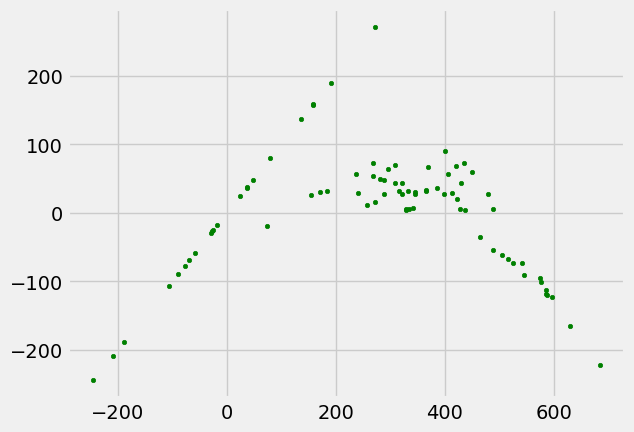

In [38]:
plt.scatter(regressor.predict(X_train), 
            regressor.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 

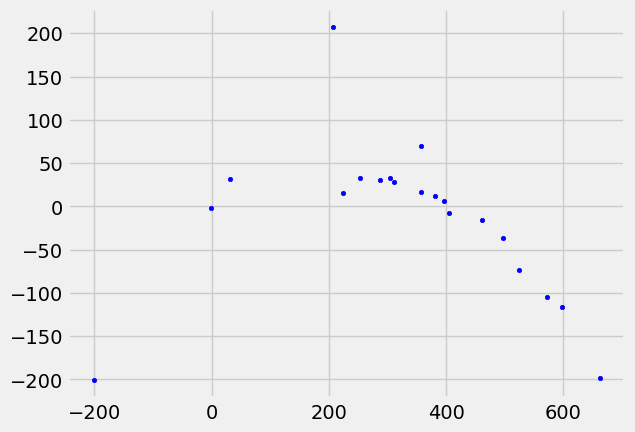

In [39]:
plt.scatter(regressor.predict(X_test), 
            regressor.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 

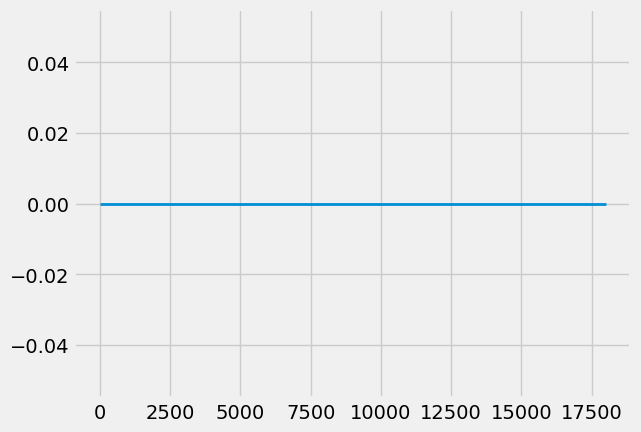

In [40]:
plt.hlines(y = 0, xmin = 0, xmax = 18000, linewidth = 2) 

## plotting legend 

C:\Users\Admin\AppData\Local\Temp\ipykernel_12040\3738487734.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')


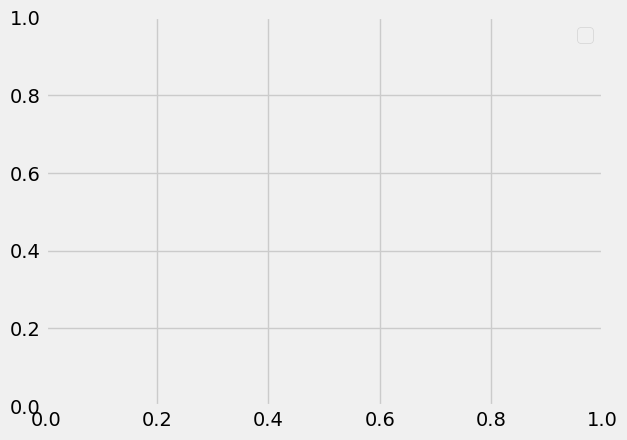

In [46]:
plt.legend(loc = 'upper right') 

## plot title 

Text(0.5, 1.0, 'Residual errors')

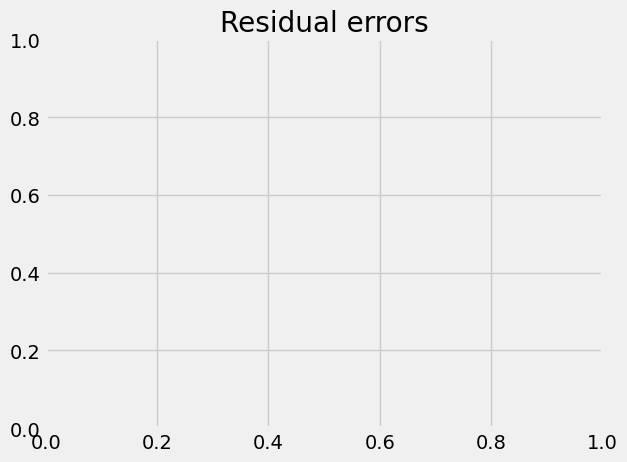

In [42]:
plt.title("Residual errors") 

## function to show plot 

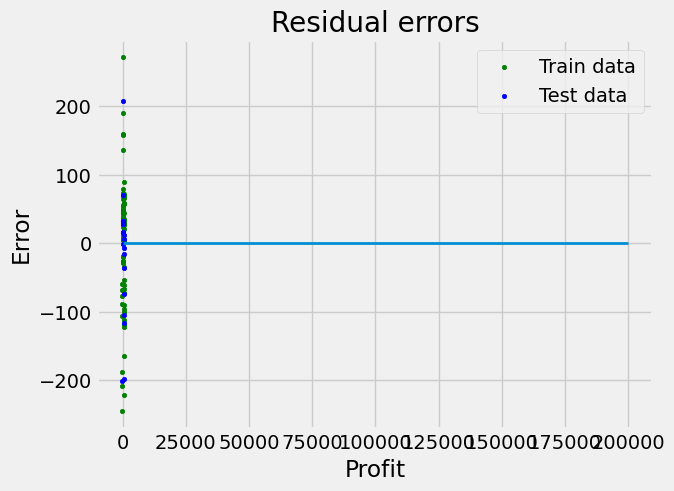

In [43]:
plt.style.use('fivethirtyeight') 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,color = "green", s = 10, label = 'Train data') 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show() 

### EVALUATING A MODEL USING R2 METRIC

#### Find the R^2 

In [45]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8588591953057938
